# Excelerate Machine Learning: Week 3

## Data Cleaning

In [52]:
import pandas as pd

In [54]:
students = pd.read_csv(r'C:\Users\Public\Downloads\final_dataset.csv')
students.head()

,Learner SignUp DateTime,Opportunity End Date,Date of Birth,Mobile Number,Zip Code,Graduation Date,Entry created at,Status Code,Apply Date,Opportunity Start Date,...,Last_Name_Hash_50,Last_Name_Hash_51,Last_Name_Hash_52,Last_Name_Hash_53,Last_Name_Hash_54,Last_Name_Hash_55,Last_Name_Hash_56,Last_Name_Hash_57,Last_Name_Hash_58,Last_Name_Hash_59
0,2023-06-14 12:30:35,2024-06-29 18:52:39,2001-12-01,923441950694,923,2023-11-01,2024-11-03 12:01:41,1080,2023-06-14 12:36:09,2022-03-11 18:30:39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-05 05:29:16,2024-06-29 18:52:39,2000-08-16,919381442895,501106,2025-05-01,2024-11-03 12:01:41,1080,2023-01-05 06:08:21,2022-03-11 18:30:39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-05-31 07:11:04,2024-06-29 18:52:39,2001-09-09,919820278783,400061,2025-12-01,2024-11-03 12:01:41,1110,2023-06-14 05:29:41,2022-03-11 18:30:39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-20 16:36:30,2024-06-29 18:52:39,2005-12-22,919870953256,250001,2028-07-01,2024-11-03 12:01:41,1080,2023-05-24 13:44:09,2022-03-11 18:30:39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-11-05 03:40:33,2024-06-29 18:52:39,1998-06-26,919549824344,202001,2025-05-01,2024-11-03 12:01:41,1070,2023-12-17 02:58:44,2022-03-11 18:30:39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
students.dtypes

Learner SignUp DateTime     object
Opportunity End Date        object
Date of Birth               object
Mobile Number                int64
Zip Code                     int64
                            ...   
Last_Name_Hash_55          float64
Last_Name_Hash_56          float64
Last_Name_Hash_57          float64
Last_Name_Hash_58          float64
Last_Name_Hash_59          float64
Length: 282, dtype: object

In [40]:
# Select the relevant columns for churn prediction
churn_columns = [
    'Learner SignUp DateTime',
    'Opportunity End Date',
    'Date of Birth',
    'Mobile Number',
    'Zip Code',
    'Graduation Date',
    'Entry created at',
    'Status Code',
    'Apply Date',
    'Opportunity Start Date',
    'Age of Learner',
    'Engagement Duration',
    'Opportunity Name_Career Essentials: Getting Started with Your Professional Journey',
    'Opportunity Name_Data Visualization',
    'Opportunity Name_Digital Marketing',
    'Opportunity Name_Freelance Mastery workshop',
    'Opportunity Name_Innovation & Entrepreneurship',
    'Opportunity Name_Join a Student Organisation',
    'Opportunity Name_Jump Start: Developing your Emotional Intelligence',
    'Opportunity Name_Mental and Physical Health Session',
    'Opportunity Name_Project Management',
    'Opportunity Name_Startup Mastery Workshop',
    'Opportunity Name_UX Redesign Challenge',
    'Opportunity Name_Upload Your First Year Transcript',
    'Opportunity Name_UrbanRenew Challenge',
    'Opportunity Name_Xperience Design Hackathon',
    'Opportunity Category_Course',
    'Opportunity Category_Engagement',
    'Opportunity Category_Event',
    'Opportunity Category_Internship',
    'Gender_Female',
    'Gender_Male',
    'Gender_Other',
    'Current Student Status_High School Student',
    'Current Student Status_Not in Education',
    'Current Student Status_Undergraduate Student',
    'Status Description_Rewards Award',
    'Status Description_Started',
    'Status Description_Team Allocated',
    'Status Description_Withdraw'
]

# Create the churn DataFrame
churn_df = students[churn_columns]

# Display the churn DataFrame
print(churn_df)

     Learner SignUp DateTime Opportunity End Date Date of Birth  \
0        2023-06-14 12:30:35  2024-06-29 18:52:39    2001-12-01   
1        2023-01-05 05:29:16  2024-06-29 18:52:39    2000-08-16   
2        2023-05-31 07:11:04  2024-06-29 18:52:39    2001-09-09   
3        2023-03-20 16:36:30  2024-06-29 18:52:39    2005-12-22   
4        2023-11-05 03:40:33  2024-06-29 18:52:39    1998-06-26   
...                      ...                  ...           ...   
2192     2023-12-27 23:52:13  2024-08-03 11:30:00    1999-01-18   
2193     2024-06-01 17:04:30  2024-08-03 11:30:00    2003-06-07   
2194     2024-05-03 16:39:21  2024-08-03 11:30:00    2006-10-14   
2195     2024-02-29 15:02:31  2024-08-03 11:30:00    1999-03-16   
2196     2023-12-23 03:53:12  2024-08-03 11:30:00    1997-05-06   

       Mobile Number  Zip Code Graduation Date     Entry created at  \
0       923441950694       923      2023-11-01  2024-11-03 12:01:41   
1       919381442895    501106      2025-05-01  2024-

## Churn Columns

In [136]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler

# Sample DataFrame creation (without repeating rows)

# Convert 'Opportunity End Date' to datetime
students['Opportunity End Date'] = pd.to_datetime(students['Opportunity End Date'])

# Create a new DataFrame for churn analysis
students_churn = students.copy()

# Create Engagement Score
students_churn['Engagement Score'] = (
    students_churn['Engagement Duration'] * 0.5 +
    students_churn[['Opportunity Name_Career Essentials: Getting Started with Your Professional Journey', 
                     'Opportunity Name_Data Visualization', 
                     'Opportunity Name_Digital Marketing']].sum(axis=1)
)

# Count Opportunity Participation
students_churn['Opportunity Participation Count'] = students_churn[
    ['Opportunity Name_Career Essentials: Getting Started with Your Professional Journey',
     'Opportunity Name_Data Visualization',
     'Opportunity Name_Digital Marketing']
].sum(axis=1)

# Calculate Days Since Last Engagement
students_churn['Days Since Last Engagement'] = (datetime.now() - students_churn['Opportunity End Date']).dt.days

## Define churn based on updated thresholds
students_churn['Churn'] = (
    (students_churn['Engagement Score'] <  2.112069) |  # Adjust threshold based on the engagement score distribution
    (students_churn['Days Since Last Engagement'] < 126) |  # Setting 30 days as the threshold for inactivity
    (students_churn['Opportunity Participation Count'] < 2)  # No participation indicates churn
).astype(int)  # Convert boolean to int

# Debugging: Check the raw data
print("Raw Engagement Duration:\n", students_churn['Engagement Duration'].describe())
print("Opportunity End Dates:\n", students_churn['Opportunity End Date'].describe())
print("Engagement Scores:\n", students_churn['Engagement Score'].describe())
print("Days Since Last Engagement:\n", students_churn['Days Since Last Engagement'].describe())
print("Oppurunity Parrticipation Count:\n", students_churn['Opportunity Participation Count'].describe())

# Scale relevant features
features_to_scale = ['Engagement Score', 'Opportunity Participation Count', 'Days Since Last Engagement']
scaler = StandardScaler()
students_churn[features_to_scale] = scaler.fit_transform(students_churn[features_to_scale])





# Count the number of churned and non-churned students
churned_count = students_churn['Churn'].sum()
non_churned_count = students_churn.shape[0] - churned_count

# Display the results
print(f'Number of Churned Students: {churned_count}')
print(f'Number of Non-Churned Students: {non_churned_count}')
students_churn[['Engagement Score', 'Opportunity Participation Count', 'Days Since Last Engagement', 'Churn']]


Raw Engagement Duration:
 count    2195.000000
mean        0.342273
std         0.070335
min         0.224138
25%         0.342912
50%         0.342912
75%         0.356322
max         0.445083
Name: Engagement Duration, dtype: float64
Opportunity End Dates:
 count                    2195
unique                      2
top       2024-06-29 18:52:39
freq                     1756
first     2024-06-29 18:52:39
last      2024-08-03 11:30:00
Name: Opportunity End Date, dtype: object
Engagement Scores:
 count    2195.000000
mean        1.971137
std         0.398119
min         1.178161
25%         2.112069
50%         2.171456
75%         2.171456
max         2.222542
Name: Engagement Score, dtype: float64
Days Since Last Engagement:
 count    2195.000000
mean      119.200000
std        13.603099
min        92.000000
25%       126.000000
50%       126.000000
75%       126.000000
max       126.000000
Name: Days Since Last Engagement, dtype: float64
Oppurunity Parrticipation Count:
 count    21

C:\Users\user\AppData\Local\Temp\ipykernel_9892\3567014883.py:40: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print("Opportunity End Dates:\n", students_churn['Opportunity End Date'].describe())


,Engagement Score,Opportunity Participation Count,Days Since Last Engagement,Churn
0,0.503279,0.5,0.5,0
1,0.631626,0.5,0.5,0
2,0.503279,0.5,0.5,0
3,-1.992260,-2.0,0.5,1
4,0.354076,0.5,-2.0,1
...,...,...,...,...
2190,0.503279,0.5,0.5,0
2191,0.631626,0.5,0.5,0
2192,0.503279,0.5,0.5,0
2193,-1.992260,-2.0,0.5,1


In [138]:
# Count the number of churn and non-churn rows
churn_counts = students_churn['Churn'].value_counts()

# Display the results
print(f"Number of Churned Students: {churn_counts.get(1, 0)}")
print(f"Number of Non-Churned Students: {churn_counts.get(0, 0)}")

Number of Churned Students: 878
Number of Non-Churned Students: 1317


       Engagement Score  Days Since Last Engagement
count      2.195000e+03                2.195000e+03
mean       7.992847e-16               -2.220446e-16
std        1.000228e+00                1.000228e+00
min       -1.992260e+00               -2.000000e+00
25%        3.540761e-01                5.000000e-01
50%        5.032791e-01                5.000000e-01
75%        5.032791e-01                5.000000e-01
max        6.316255e-01                5.000000e-01


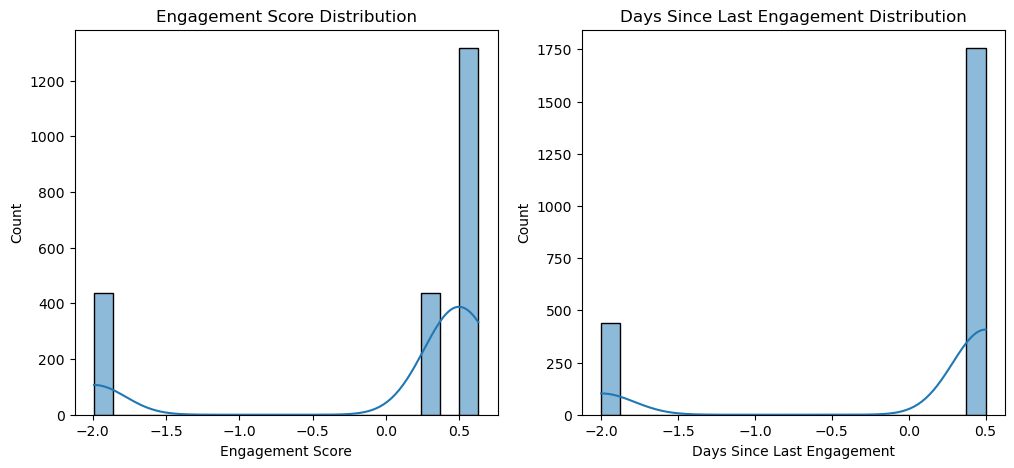

In [140]:
# Display statistics for Engagement Score and Days Since Last Engagement
print(students_churn[['Engagement Score', 'Days Since Last Engagement']].describe())

# Visualize the distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(students_churn['Engagement Score'], bins=20, kde=True)
plt.title('Engagement Score Distribution')

plt.subplot(1, 2, 2)
sns.histplot(students_churn['Days Since Last Engagement'], bins=20, kde=True)
plt.title('Days Since Last Engagement Distribution')

plt.show()

## Model Training

### Logistic Regression

In [144]:
# Data Prep:

import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Assuming students_churn DataFrame is already prepared from previous steps
# Preparing feature set and target variable
X = students_churn[['Engagement Score', 'Opportunity Participation Count', 'Days Since Last Engagement']]
y = students_churn['Churn']

# Data Split:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# hyper-parameter tuning
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('logreg', LogisticRegression(solver='liblinear'))  # Logistic Regression
])

# Define the parameter grid
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse regularization strength
    'logreg__penalty': ['l1', 'l2']  # Regularization type
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# model eval:

# Make predictions
y_pred = grid_search.predict(X_test)

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


# cross validation
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("Cross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Score: ", cv_scores.mean())


Best parameters found:  {'logreg__C': 0.001, 'logreg__penalty': 'l2'}
Confusion Matrix:
 [[395   0]
 [  0 264]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       264

    accuracy                           1.00       659
   macro avg       1.00      1.00      1.00       659
weighted avg       1.00      1.00      1.00       659

Accuracy Score: 1.0
Cross-Validation Scores:  [1. 1. 1. 1. 1.]
Mean Cross-Validation Score:  1.0


In [146]:
# Evaluate the model on the training set
y_train_pred = grid_search.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Display training set metrics
print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

Training Accuracy: 1.0
Training Confusion Matrix:
 [[922   0]
 [  0 614]]
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       922
           1       1.00      1.00      1.00       614

    accuracy                           1.00      1536
   macro avg       1.00      1.00      1.00      1536
weighted avg       1.00      1.00      1.00      1536



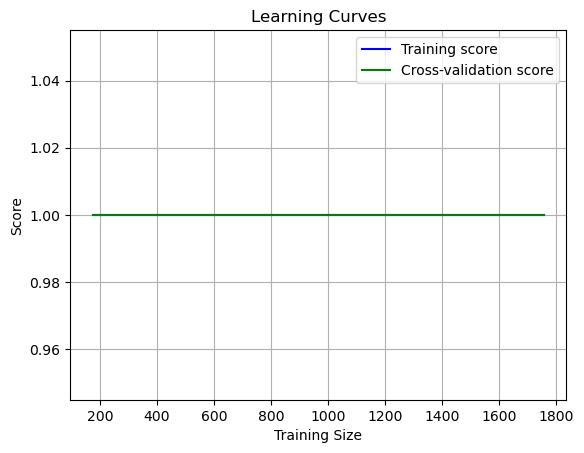

In [148]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X, y, cv=5, n_jobs=-1)

# Calculate the mean and std deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plotting
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='green')
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

This data is just way too perfect because there the data has throughly been cleaned, and that there is nothing to as such "predict" here.

### Decision Tree

Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Confusion Matrix:
 [[263   0]
 [  0 176]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       176

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439

Accuracy Score: 1.0
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0


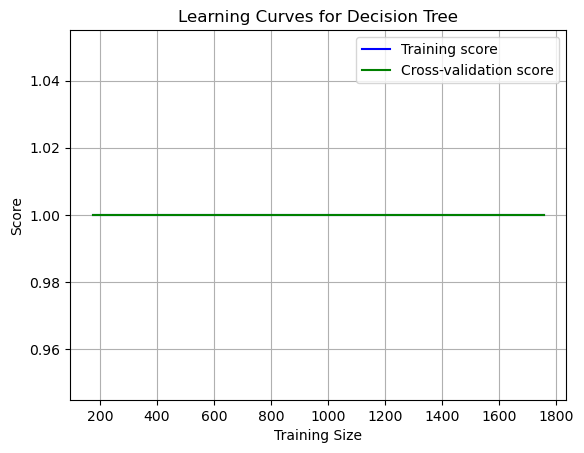

In [152]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Assuming 'students_churn' is your DataFrame from previous steps

# Prepare features and labels
X = students_churn[['Engagement Score', 'Opportunity Participation Count', 'Days Since Last Engagement']]
y = students_churn['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Set up the parameter grid for the Decision Tree
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Set up Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Predictions on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Accuracy Score:", accuracy)

# Cross-Validation Scores
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X, y, cv=5, n_jobs=-1)

# Calculate the mean and std deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plotting Learning Curves
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='green')
plt.title('Learning Curves for Decision Tree')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

Yikes!!! Bruh what is going on here.

### Support Vector Machines (SVM)

Best parameters found: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Confusion Matrix:
 [[263   0]
 [  0 176]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       176

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439

Accuracy Score: 1.0
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0


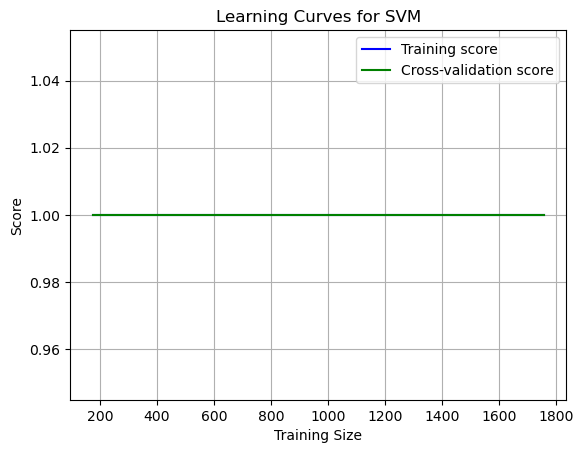

In [156]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Assuming 'students_churn' is your DataFrame from previous steps

# Prepare features and labels
X = students_churn[['Engagement Score', 'Opportunity Participation Count', 'Days Since Last Engagement']]
y = students_churn['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Set up the parameter grid for the SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the SVM Classifier
svm = SVC(random_state=42)

# Set up Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Predictions on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Accuracy Score:", accuracy)

# Cross-Validation Scores
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X, y, cv=5, n_jobs=-1)

# Calculate the mean and std deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plotting Learning Curves
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='green')
plt.title('Learning Curves for SVM')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

### K-Nearest Neighbor:

Best parameters found: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Confusion Matrix:
 [[263   0]
 [  0 176]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       176

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439

Accuracy Score: 1.0
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0


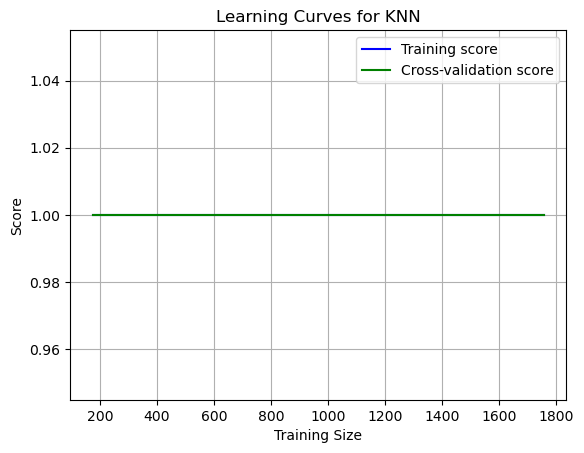

In [159]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Assuming 'students_churn' is your DataFrame from previous steps

# Prepare features and labels
X = students_churn[['Engagement Score', 'Opportunity Participation Count', 'Days Since Last Engagement']]
y = students_churn['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Set up the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN Classifier
knn = KNeighborsClassifier()

# Set up Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Predictions on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Accuracy Score:", accuracy)

# Cross-Validation Scores
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X, y, cv=5, n_jobs=-1)

# Calculate the mean and std deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plotting Learning Curves
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='green')
plt.title('Learning Curves for KNN')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

### Random Forest:

In [164]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Removed 'auto' and added valid options
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with cross-validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42,
                               n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found:", rf_random.best_params_)

# Predictions
y_pred = rf_random.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Cross-Validation Scores
cv_scores = rf_random.best_estimator_.score(X_test, y_test)
print(f"Cross-Validation Score: {cv_scores}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Confusion Matrix:
 [[263   0]
 [  0 176]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       176

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439

Accuracy Score: 1.0
Cross-Validation Score: 1.0


### Artificial Neural Network (ANN):

In [168]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

# Assuming students_churn DataFrame is ready
# Features and target variable
X = students_churn[['Engagement Score', 'Opportunity Participation Count', 'Days Since Last Engagement']]
y = students_churn['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),  # Hidden layer 1
    layers.Dense(32, activation='relu'),  # Hidden layer 2
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9274 - loss: 0.5147 - val_accuracy: 1.0000 - val_loss: 0.2117
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.1545 - val_accuracy: 1.0000 - val_loss: 0.0498
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0357 - val_accuracy: 1.0000 - val_loss: 0.0166
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 0.0081
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - 

### Recurrent Neural Network (RNN):

Epoch 1/50


C:\Users\user\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7048 - loss: 0.6186 - val_accuracy: 1.0000 - val_loss: 0.3374
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.2792 - val_accuracy: 1.0000 - val_loss: 0.0993
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0828 - val_accuracy: 1.0000 - val_loss: 0.0234
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0234 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 8.6117e-04
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 4.

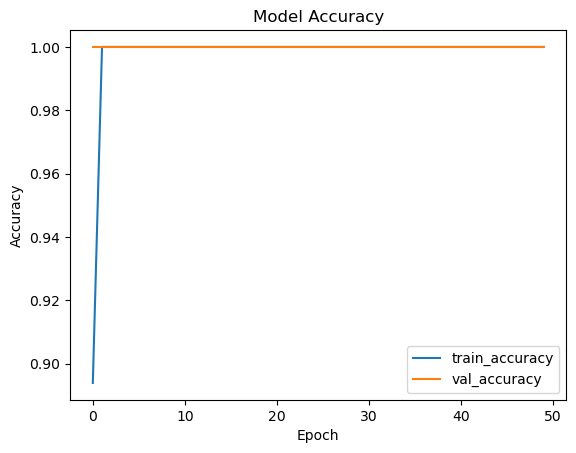

In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Assume students_churn DataFrame is already prepared as before

# Features and target
X = students_churn[['Engagement Score', 'Opportunity Participation Count', 'Days Since Last Engagement']].values
y = students_churn['Churn'].values

# Reshape the input data for RNN [samples, timesteps, features]
# Here we assume 1 timestep for simplicity
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0], X_train.shape[2])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(X_test.shape[0], X_test.shape[2])).reshape(X_test.shape)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Optionally, visualize the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Autoencoder

Epoch 1/50


C:\Users\user\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2256 - val_loss: 1.2882
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2332 - val_loss: 1.2611
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1839 - val_loss: 1.2295
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2270 - val_loss: 1.1957
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1690 - val_loss: 1.1483
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1270 - val_loss: 1.0801
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0280 - val_loss: 1.0390
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0237 - val_loss: 1.0131
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0216 - val_loss: 0.9965
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9659 - val_loss: 0.9850
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0095 - val_loss: 0.9760
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9224 - val_loss: 0.9690


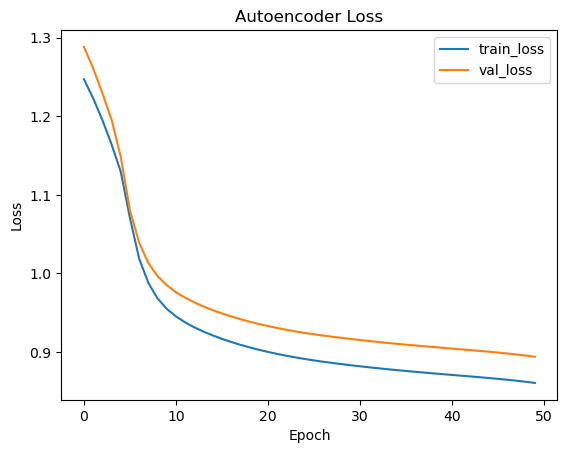

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


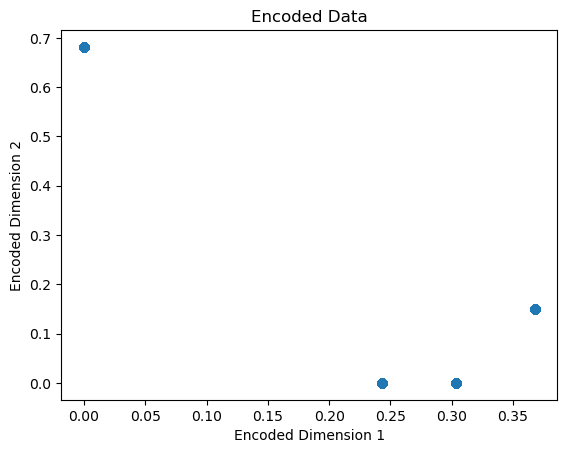

In [176]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assume students_churn DataFrame is already prepared as before

# Features for the autoencoder
X = students_churn[['Engagement Score', 'Opportunity Participation Count', 'Days Since Last Engagement']].values

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the autoencoder model
autoencoder = Sequential()
# Encoder
autoencoder.add(Dense(2, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Compress to 2 dimensions
# Decoder
autoencoder.add(Dense(X_train_scaled.shape[1], activation='sigmoid'))  # Reconstruct to original dimensions

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(X_train_scaled, X_train_scaled,
                           epochs=50,
                           batch_size=32,
                           validation_split=0.2)

# Evaluate the autoencoder
loss = autoencoder.evaluate(X_test_scaled, X_test_scaled)
print(f'Test Loss: {loss}')

# Optionally, visualize the training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Autoencoder Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Optional: Use the encoder to reduce dimensionality
encoder = Sequential()
encoder.add(Dense(2, activation='relu', input_shape=(X_train_scaled.shape[1],)))
# Encode the data
X_encoded = encoder.predict(X_train_scaled)

# Visualize the encoded data
plt.scatter(X_encoded[:, 0], X_encoded[:, 1])
plt.title('Encoded Data')
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.show()

### Multi-Layer Perceptron (MLP)

In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming `students_churn` is your DataFrame
X = students_churn[['Engagement Score', 'Opportunity Participation Count', 'Days Since Last Engagement']]
y = students_churn['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[262   0]
 [  0 177]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       1.00      1.00      1.00       177

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439

Accuracy Score: 1.0
